# Recognition of handwritten digits (MNIST) with neural networks

## Setup

In [6]:
#!pip install keras

     |████████████████████████████████| 662 kB 4.6 MB/s 


In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

In [8]:
#data = tfds.load('mnist', split='train', as_supervised=True, shuffle_files=True)
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

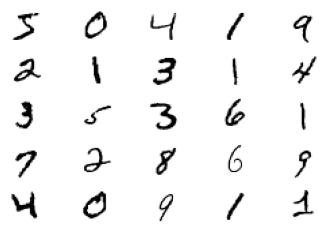

In [9]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [10]:
# shape of a single data point
xtrain[0].shape

(28, 28)

In [11]:
xtrain.shape

(60000, 28, 28)

In [12]:
xtest.shape

(10000, 28, 28)

In [13]:
model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [15]:
xtrain = xtrain.reshape((60000, 28 * 28))
xtrain = xtrain.astype('float32') / 255

xtest = xtest.reshape((10000, 28 * 28))
xtest = xtest.astype('float32') / 255

In [16]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [17]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=500, validation_split = 0.20)

Epoch 1/10
96/96 [==============================] - 2s 20ms/step - loss: 0.4766 - accuracy: 0.8686 - val_loss: 0.2404 - val_accuracy: 0.9343
Epoch 2/10
96/96 [==============================] - 2s 17ms/step - loss: 0.2212 - accuracy: 0.9377 - val_loss: 0.1877 - val_accuracy: 0.9463
Epoch 3/10
96/96 [==============================] - 1s 14ms/step - loss: 0.1619 - accuracy: 0.9539 - val_loss: 0.1432 - val_accuracy: 0.9607
Epoch 4/10
96/96 [==============================] - 1s 14ms/step - loss: 0.1253 - accuracy: 0.9646 - val_loss: 0.1221 - val_accuracy: 0.9643
Epoch 5/10
96/96 [==============================] - 1s 13ms/step - loss: 0.1004 - accuracy: 0.9717 - val_loss: 0.1121 - val_accuracy: 0.9666
Epoch 6/10
96/96 [==============================] - 1s 12ms/step - loss: 0.0831 - accuracy: 0.9768 - val_loss: 0.1092 - val_accuracy: 0.9672
Epoch 7/10
96/96 [==============================] - 1s 13ms/step - loss: 0.0691 - accuracy: 0.9803 - val_loss: 0.0913 - val_accuracy: 0.9725
Epoch 8/10
96

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
train_loss, train_acc = model.evaluate(xtrain, ytrain)
test_loss, test_acc = model.evaluate(xtest, ytest)

print("Train accuracy:", round(train_acc, 3))
print("Train loss:", round(train_loss, 3))

print("Test accuracy:", round(test_acc, 3))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9759
Train accuracy: 0.988
Train loss: 0.045
Test accuracy: 0.976
Test loss: 0.077


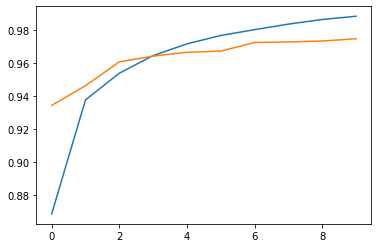

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

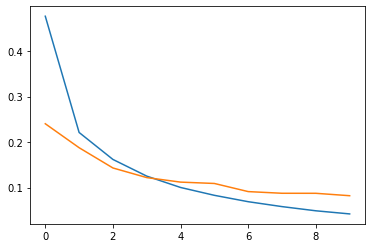

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])